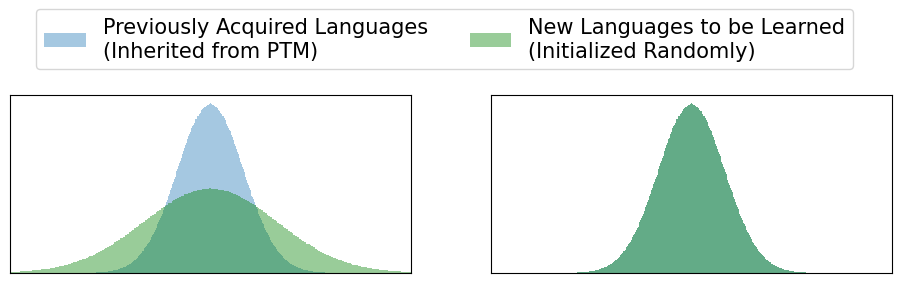

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(9, 2.7))
size=1e7
bins=4e2
fontsize=16

ax = plt.subplot(1, 2, 1)
values1 = np.random.normal(0, 0.01, int(size))
ax.hist(
    values1, 
    bins=int(bins), 
    alpha=0.4,
    density=True, 
    label='Previously Acquired Languages\n(Inherited from PTM)'
)

values2 = np.random.normal(0, 0.02, int(size))
ax.hist(
    values2, 
    bins=int(bins), 
    color='green', 
    alpha=0.4, 
    density=True,
    label='New Languages to be Learned\n(Initialized Randomly)'
)

plt.yticks([])
plt.xticks([])
plt.xlim(-0.06, 0.06)
plt.legend(
    frameon=True, 
    bbox_to_anchor=(0.065, 1.48), 
    ncol=2, 
    loc=2, 
    borderaxespad=0., 
    fontsize=fontsize-1,
    columnspacing=2)


ax = plt.subplot(1, 2, 2)
ax.hist(
    values1, 
    bins=int(bins), 
    alpha=0.4,
    density=True, 
)

ax.hist(
    values1, 
    bins=int(bins), 
    color='green', 
    alpha=0.4, 
    density=True,
)

plt.yticks([])
plt.xticks([])
plt.xlim(-0.06, 0.06)
# plt.legend(bbox_to_anchor=(0.0, -0.015), loc=2, borderaxespad=0., fontsize=fontsize)
plt.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.67)
# plt.savefig('intro.png', dpi=300)
# # plt.show()

# Analysis on Attention

In [1]:
import os
os.makedirs('plot_results', exist_ok=True)

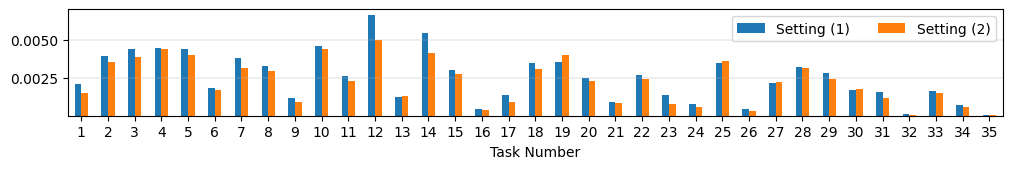

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10, 1.5))
ax = plt.subplot(111)
id0_kl = pd.read_csv('analysis_results/attention_kl_id0.txt', sep='\t')['kl_div'].to_frame()
id1_kl = pd.read_csv('analysis_results/attention_kl_id1.txt', sep='\t')['kl_div'].to_frame()
concat_data = pd.concat([id0_kl, id1_kl], axis=1)
concat_data.columns = ['Setting (1)', 'Setting (2)']
concat_data.plot.bar(ax=ax, rot=0)
ax.grid(axis='y', linewidth=0.3)
# ax.set_yticks([])
# ax.set_ylabel('KL-Divergence')
ax.set_xlabel('Task Number')
ax.set_ylim(1e-6, 0.007 - 1e-6)
ax.set_xticklabels([f'{i + 1}' for i in range(len(concat_data.index))])
plt.legend(ncol=2, loc='upper right')

plt.subplots_adjust(right=0.995, left=0.06, bottom=0.28, top=0.99)
plt.savefig('plot_results/ablation_attention_kl.png', dpi=300)


# Analysis on Model Convergence

In [4]:
import os
os.makedirs('plot_results', exist_ok=True)

In [5]:
import pandas as pd
loss_data = pd.read_csv('analysis_results/converge_loss.txt', sep='\t', names=['model', 'noise', 'loss'])
setting = pd.DataFrame({'setting': [f'({i+1})' for i in range(len(loss_data))]})
loss_data = pd.concat((loss_data, setting), axis=1).set_index('setting')
loss_data

,model,noise,loss
setting,,,
(1),CLL_CLIP,0,0.092559
(2),CLL_CLIP_Oracle0_ID1_REG0,0,0.088714
(3),CLL_CLIP_Oracle0_ID0_REG1_g,0,0.089021
(4),CLL_CLIP_Oracle0_ID0_REG1_d,0,0.080147
(5),CLL_CLIP_Oracle0_ID0_REG1_gd,0,0.074249
(6),CLL_CLIP_with_TEIR,0,0.072702
(7),CLL_CLIP_Oracle1_ID1_REG1_gd,0,0.065201


In [6]:
fisher_data = pd.read_csv('analysis_results/converge_fisher.txt', sep='\t', names=['model', 'fisher'])
setting = pd.DataFrame({'setting': [f'({i+1})' for i in range(len(fisher_data))]})
fisher_data = pd.concat((fisher_data, setting), axis=1).set_index('setting')
fisher_data

,model,fisher
setting,,
(1),CLL_CLIP,7.068651
(2),CLL_CLIP_Oracle0_ID1_REG0,5.993297
(3),CLL_CLIP_Oracle0_ID0_REG1_g,6.886282
(4),CLL_CLIP_Oracle0_ID0_REG1_d,2.226243
(5),CLL_CLIP_Oracle0_ID0_REG1_gd,1.909094
(6),CLL_CLIP_with_TEIR,1.629657
(7),CLL_CLIP_Oracle1_ID1_REG1_gd,1.623757


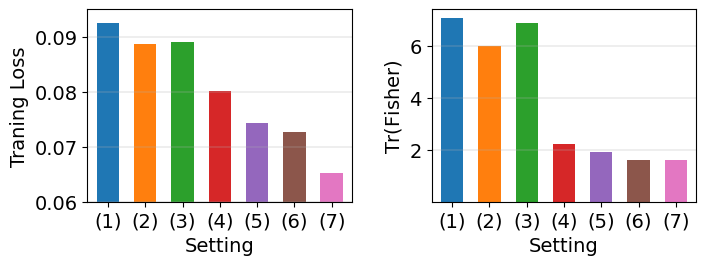

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

fontsize=14
fig = plt.figure(figsize=(7, 2.5))

colors = [
    '#1f77b4',
    '#ff7f0e',
    '#2ca02c',
    '#d62728',
    '#9467bd',
    '#8c564b',
    '#e377c2',
]

ax = plt.subplot(1,2,1)
loss_data['loss'].plot(kind='bar', ax=ax, width=0.6, color=colors, rot=0)
ax.set_ylabel('Traning Loss', fontsize=fontsize)
ax.set_xlabel(r'Setting', fontsize=fontsize)
ax.set_ylim(0.06, 0.095)
plt.grid(axis='y', linewidth=0.3)
_ = plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)

ax = plt.subplot(1,2,2)
fisher_data['fisher'].plot(kind='bar', ax=ax, width=0.6, color=colors, rot=0)
ax.set_ylabel(r'${\rm Tr}(\rm Fisher)$', fontsize=fontsize)
ax.set_xlabel(r'Setting', fontsize=fontsize)
ax.set_ylim(0.01)
plt.grid(axis='y', linewidth=0.3)
_ = plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)

plt.subplots_adjust(wspace=0.3, right=0.99, left=0.12, bottom=0.22, top=0.99)
plt.savefig('plot_results/ablation_loss_fisher.png', dpi=300)

# CLL-CLIP's Core Designs

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('results/xm3600_CL_retrieval_cl_AA.csv')

def filter_df(data, keys, values, new_index_names=None):
    out = data
    for key, value in zip(keys, values):
        out = out[out[key] == value]
    if len(out) > 1:
        out = pd.DataFrame([out.iloc[-1].to_dict()])
    if new_index_names is not None:
        out.index = pd.Series(new_index_names)
    return out

def plot(models, names, 
         colors=None,
         metric='img_r1', 
         ylabel=r'Text-to-Image AR$_t$ on XM3600', 
         xlabel=r'# Tasks Processed ($t$)',
         markers='o', markevery = [0, 35], markersize=8, 
         figsize=(3, 5), fontsize=14, ylim=None, save_path=None,
         subplots_adjust_kwargs={'left': 0.2, 'right': 0.99, 'top': 0.99, 'bottom': 0.14},
         ax=None,
         ):

    if type(markers) is str:
        markers = [markers] * len(models)
    
    if colors is not None:
        assert isinstance(colors, (tuple, list))
        assert len(colors) == len(models)
    else:
        colors = [None] * len(models)

    if ax is None:
        fig = plt.figure(figsize=figsize)
        ax = plt.subplot(111)

    dfs = []
    for model, name, marker, color in zip(models, names, markers, colors):
        df = filter_df(data, 
                ['metric', 'model'], 
                [metric, model],
                name,
        ).drop(['model', 'metric'], axis=1, inplace=False).rename(columns={f'{i}': i+1 for i in range(36)})
        dfs.append(df)
        plot_kwargs = dict(ax=ax, marker=marker, markevery=markevery, markersize=markersize)
        if color is not None:
            plot_kwargs['color'] = color
        df.T.plot(**plot_kwargs)

    ax.set_ylabel(ylabel, fontsize=fontsize)
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.legend(fontsize=fontsize)
    ax.grid()
    if ylim is not None:
        ax.set_ylim(ylim)
        
    _ = plt.xticks(fontsize=fontsize)
    _ = plt.yticks(fontsize=fontsize)

    if subplots_adjust_kwargs is not None:
        print(subplots_adjust_kwargs)
        plt.subplots_adjust(**subplots_adjust_kwargs)
    
    if save_path is not None:
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path, dpi=300)

In [9]:
import os
os.makedirs('plot_results', exist_ok=True)

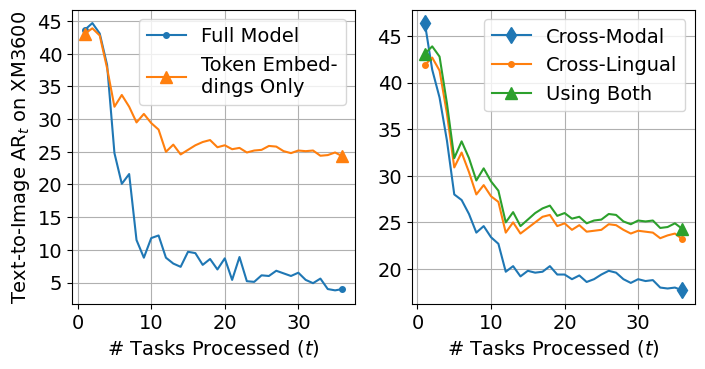

In [10]:
fig = plt.figure(figsize=(7, 3.5))

models = [
'coco/CL/B16_Ablation_trainAll/order222',
'coco/CL/B16_CLL_CLIP_with_TEIR/order222',
]

names = [
    'Full Model',
    'Token Embed-\ndings Only',
]

colors = None
markers = ['.', '^']

ax = plt.subplot(121)
plot(models, names, ax=ax, subplots_adjust_kwargs=None, colors=colors, markers=markers)


models = [
'coco/CL/B16_Ablation_onlyCrossModal/order222',
'coco/CL/B16_Ablation_onlyCrossLingual/order222',
'coco/CL/B16_CLL_CLIP_with_TEIR/order222',
]

names = [
    'Cross-Modal',
    'Cross-Lingual',
    'Using Both',
]

colors = None
markers = ['d', '.', '^']

ax = plt.subplot(122)
plot(models, names, ax=ax, subplots_adjust_kwargs=None, colors=colors, markers=markers, ylabel='')

subplots_adjust_kwargs={'left': 0.1, 'right': 0.99, 'top': 0.99, 'bottom': 0.15, 'wspace': 0.2}
plt.subplots_adjust(**subplots_adjust_kwargs)
plt.savefig('plot_results/ablation_cll_clip.png', dpi=300)

# Translate Test

In [11]:
def collect_fused_scores(data, method_name, metric_name, fusion_type='score_', key='Average'):
    satisfied_data = data[data['metric'] == metric_name]
    scales = []
    scores = []
    en_score = None
    for i in range(len(satisfied_data)):
        line = satisfied_data.iloc[i]
        this_method = line['model']
        if method_name in this_method and fusion_type in this_method:
            scale = float(this_method.split('_')[-1])
            score = line[key]
            scales.append(scale)
            scores.append(score)

            if scale == 0.0:
                en_score = line['en']

    return scales, scores, en_score


def collect_translated_scores(data, method_name, metric_name, key='Average'):
    satisfied_data = data[data['metric'] == metric_name]
    for i in range(len(satisfied_data)):
        line = satisfied_data.iloc[i]
        this_method = line['model']
        if method_name in this_method:
            score = line[key]
            en_score = line[f'en']
            return score, en_score

In [12]:
import os
os.makedirs('plot_results', exist_ok=True)

In [13]:
import pandas as pd

fused_data = pd.read_csv('analysis_results/fused.csv')
translated_data = pd.read_csv('analysis_results/translated.csv')

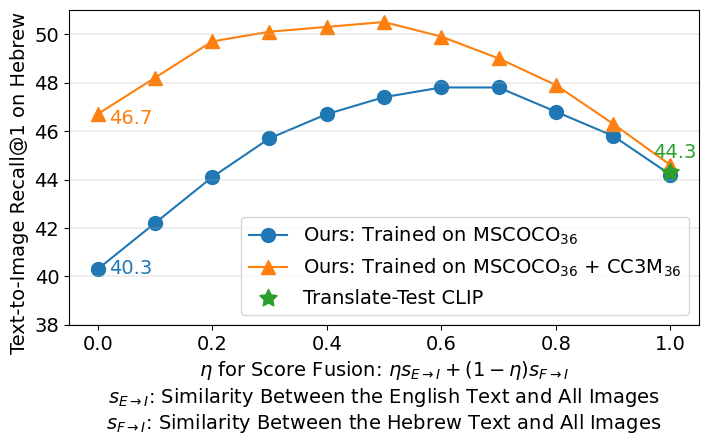

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

# metric = 'txt_r1', 'Image-to-Text Recall@1 on Hebrew'
metric, ylabel = 'img_r1', 'Text-to-Image Recall@1 on Hebrew'
key = 'he'
fontsize = 14
fig = plt.figure(figsize=(7, 4.2))

color = '#1f77b4'
scales, scores, en_score = collect_fused_scores(fused_data, 'coco/B16_CLL_CLIP_with_TEIR', metric, 'score', key=key)
plt.plot(scales, scores, label=r'Ours: Trained on MSCOCO$_{36}$', marker='o', markersize=10, c=color, zorder=1)
plt.text(0.02, scores[0] - 0.2, f"{scores[0]}", fontdict={'color': color, 'size': fontsize})

color = '#ff7f0e'
scales, scores, en_score = collect_fused_scores(fused_data, 'coco_cc3m/B16_CLL_CLIP_with_TEIR', metric, 'score', key=key)
plt.plot(scales, scores, label=r'Ours: Trained on MSCOCO$_{36}$ + CC3M$_{36}$', marker='^', markersize=10, c=color, zorder=1)
plt.text(0.02, scores[0] - 0.4, f"{scores[0]}", fontdict={'color': color, 'size': fontsize})

color = '#2ca02c'
clip_score, clip_en_score = collect_translated_scores(translated_data, 'zero_shot/openai_clip', metric, key=key)
plt.scatter(1.0, clip_score, s=170, c=color, marker=(5,1), label='Translate-Test CLIP', zorder=2)
plt.text(0.97, clip_score+0.6, f"{clip_score}", fontdict={'color': color, 'size': fontsize})

xlabel = r'$\eta$ for Score Fusion: $\eta s_{E\rightarrow I} + (1 - \eta) s_{F\rightarrow I}$' \
    + '\n' \
    + r'$s_{E\rightarrow I}$: Similarity Between the English Text and All Images' \
    + '\n' \
    + r'$s_{F\rightarrow I}$: Similarity Between the Hebrew Text and All Images'
plt.ylabel(ylabel, fontsize=fontsize, y=0.45)
plt.xlabel(xlabel, fontsize=fontsize)
_ = plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)
plt.grid(axis='y', linewidth=0.3)
plt.ylim(38, 51)
plt.legend(fontsize=fontsize)

plt.subplots_adjust(right=0.99, left=0.09, bottom=0.24, top=0.99)
plt.savefig('plot_results/ablation_translate_test.png', dpi=300)